In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv , warnings
import Gaussian_Power_Model
import Cosine_Power_Model

In [2]:
datasheet = '742nm_1125-1084-ND_sweeps10_boxcar10_.csv'
file = csv.reader(open(datasheet))
data = []
x_axis = []
x_axis_rad = []
y_axis = []
Power = []

for row in file:
    try :
        data.append([float(row[0]),float(row[1])])
    except :
        pass

data.sort(key = lambda x: x[0])

for item in data :
    x_axis_rad.append(item[0]*np.pi/180)
    x_axis.append(item[0])
    y_axis.append(item[1])

bound = [[.1 , [0 , 1] , [0 ,90] , [0 , 90]] , [.2 ,[0,.2] , [0 , 90] , [0 , 90]] , [.2, [0 , 0.2] , [0 ,90] , [0 , 90]] , [.2, [0 , 0.2] , [0 ,90] , [0 , 90]]]

Power_g , Error_g , Param_g = Gaussian_Power_Model.model_fit(x_axis , y_axis , .02 , bound)

RMSE: 0.09941284212999353
R-squared: 0.8814905618628628

RMSE: 0.0858934119252417
R-squared: 0.8898555039102257

RMSE: 0.08553672385682669
R-squared: 0.8910779284838528

RMSE: 0.11184099768248275
R-squared: 0.8338572246560463

Cannot achieve desired accuracy given boundaries specified
Either increase length of boundary specification or decrease desired accuracy


Model Variables
	   g1 		   g2 		   g3
1. 	 9.000e-01 	 1.111e+00 	 1.111e+01 
2. 	 6.667e-02 	 5.000e+01 	 3.000e+01 
3. 	 2.222e-02 	 4.000e+01 	 1.000e+01 
4. 	 2.000e-01 	 1.000e+01 	 1.000e+01 


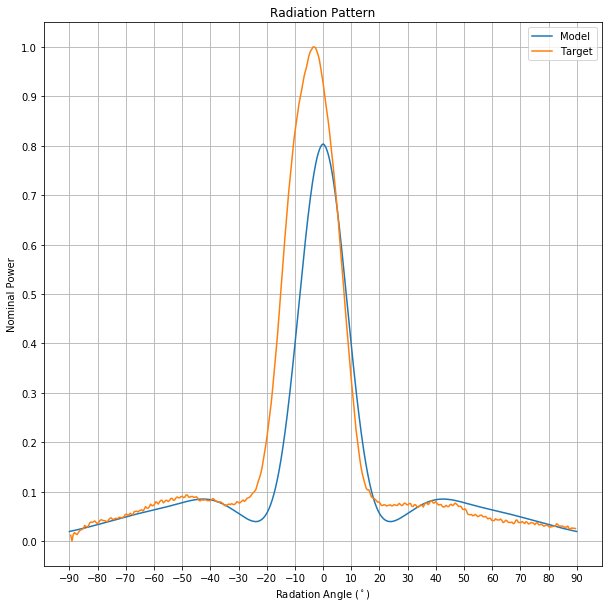

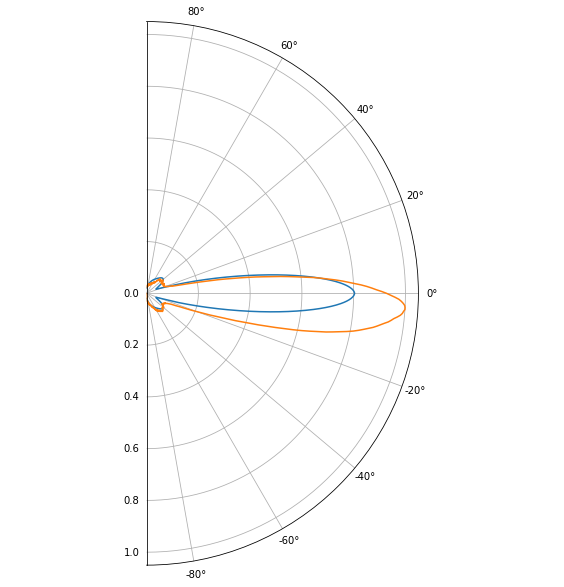

In [3]:
Gaussian_Power_Model.model_plot(Param_g , x_axis , y_axis)

In [4]:
datasheet = '742nm_1125-1084-ND_sweeps10_boxcar10_.csv'
file = csv.reader(open(datasheet))  #read in relevant datasheet
angle = np.linspace(-90 , 90 , 181*20)
theta = angle*np.pi/180
data = []
x_axis = []
x_axis_rad = []
y_axis = []
Power = []

for row in file:
    try :
        data.append([float(row[0]),float(row[1])])
    except :
        pass

data.sort(key = lambda x: x[0])  #sorts the array in ascending order

for item in data :
    x_axis_rad.append(item[0]*np.pi/180) #converts to radians
    x_axis.append(item[0])
    y_axis.append(item[1])
    
    
"Specifying the boundary will affect the accuracy of the model."
"It is easiest to start with a relatively low accuracy and refine the boundary accoringly"
bound = [[.01 , [0 , 1] , [0 ,0] , [0 , 10]] , [.05,[0,.2] , [45 , 90] , [0 , 200]] , [.05, [0 , 0.2] , [0 ,45] , [0 , 200]] , [.015,[0 , 0.2] , [0 ,90] , [0 , 200]]]

Power_c , Error_c , Param_c = Cosine_Power_Model.model_fit(x_axis , y_axis , .017 , bound)

RMSE: 0.10068110411080543
R-squared: 0.8652169384710265

RMSE: 0.08985078369975309
R-squared: 0.879531071174007

RMSE: 0.08908843694732216
R-squared: 0.8819373051308477

RMSE: 0.11008397683650357
R-squared: 0.8375121521629327

Cannot achieve desired accuracy given boundaries specified
Either increase length of boundary specification or decrease desired accuracy


Model Variables
	   c1 		   c2 		   c3
1. 	 8.720e-01 	 0.000e+00 	 2.414e+01 
2. 	 8.112e-02 	 5.268e+01 	 1.273e+01 
3. 	 5.838e-02 	 0.000e+00 	 2.000e+02 
4. 	 2.390e-01 	 1.083e+01 	 8.081e+01 


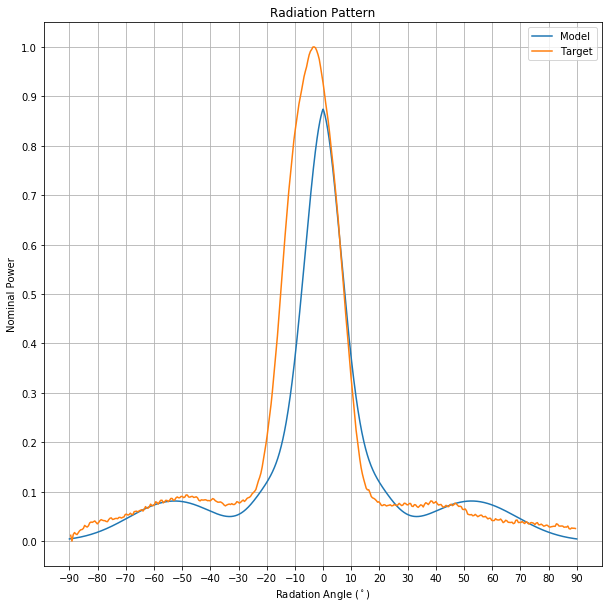

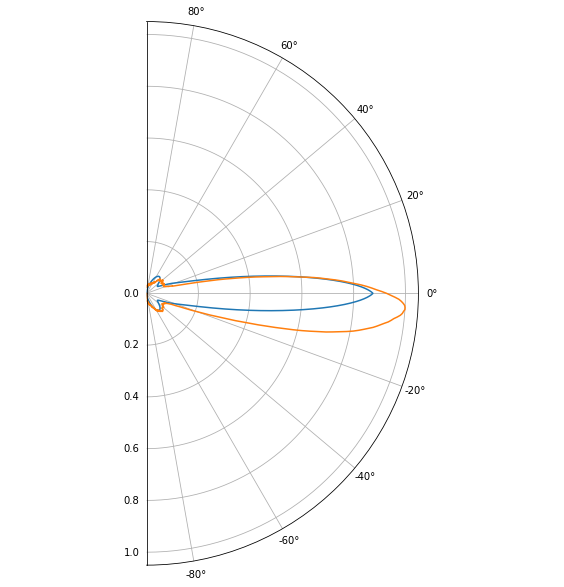

In [5]:
Cosine_Power_Model.model_plot(Param_c , x_axis , y_axis)

In [6]:
Param , model = Gaussian_Power_Model.model_choice(Param_c , Power_c , Param_g , Power_g , y_axis)

RMSE: 0.037381766947655985
R-squared: 0.9889676808374712

RMSE: 0.03632146233859796
R-squared: 0.9883701669085342



([[1.0, 0.0, 40.0],
  [0.11111111111111112, 70.0, 10.0],
  [0.06666666666666667, 20.0, 10.0]],
 'Gaussian Power Model')